# Figure S21 code

**Load in functions**

In [2]:
import importlib
import itertools
import matplotlib as plt
import functions_paper_1_MEE
from functions_paper_1_MEE import *
import rushd as rd
import seaborn as sns
exec(open("functions_paper_1_MEE.py").read())
sns.set_context('paper')
from statannot import add_stat_annotation
import openpyxl

**Set all data and yaml paths for plates**

In [ ]:
# Set paths to the experiment folder and where to find the data
datadir = Path(Path('../../datadir_mee.txt').read_text())
base_path = datadir/'instruments'/'data'/'attune'/'Mary'

Plates = {'2024.11.08_minP_EFS_CAG_retest': ['Plate1', 'Plate3'],
          '2024.11.22_CAG_minP_repeat': ['Plate1'],
          '2024.12.16_MLP_2reps': ['Plate1'],
          '2024.11.18_minP_CAG_rep3': ['Plate1']
          }

channel_list = ['mRuby2-A', 'mGL-A', 'iRFP670-A', 'FSC-A', 'SSC-A', 'TagBFP-A']

**Generate plate dictionary with well metadata**

In [ ]:
exp_path = []
yaml_path = []

for i in Plates:
    for j in Plates[i]:
        exp_path.append(base_path/i/j/'export_singlets')
        yaml_path.append(base_path/i/j/'export_singlets'/'well_metadata.yaml')

output_path = './figs_2024_promoter_editing_paper/figureS21_TET_DIAL/'

plates_dict = pd.DataFrame({
    'data_path' : [exp for exp in exp_path],
    'yaml_path' : [yaml for yaml in yaml_path]
})

display(plates_dict)

,data_path,yaml_path
0,C:\Users\chemegrad202\Massachusetts Institute ...,C:\Users\chemegrad202\Massachusetts Institute ...
1,C:\Users\chemegrad202\Massachusetts Institute ...,C:\Users\chemegrad202\Massachusetts Institute ...
2,C:\Users\chemegrad202\Massachusetts Institute ...,C:\Users\chemegrad202\Massachusetts Institute ...
3,C:\Users\chemegrad202\Massachusetts Institute ...,C:\Users\chemegrad202\Massachusetts Institute ...
4,C:\Users\chemegrad202\Massachusetts Institute ...,C:\Users\chemegrad202\Massachusetts Institute ...


**Load Data in and cache it**

In [ ]:
data_new = pd.DataFrame()
channel_list = ['mRuby2-A', 'mGL-A', 'iRFP670-A','TagBFP-A', 'FSC-A', 'SSC-A']
data_new = rd.flow.load_groups_with_metadata(plates_dict, columns=channel_list) #Could add in columns=channel_list here to get specific columns

# Remove negative values from dataframe
for c in channel_list: data_new = data_new[data_new[c] > 0]

# Remove NaN values
data_new.dropna(inplace=True)

data = data_new.copy()

**Gating Data based on co-transfection marker**

In [6]:
iRFP670_gate = 10000
mRuby2_gate = 200 
mGL_gate = data[data.CRE == '-CRE']['mGL-A'].quantile(0.9999)
gated = data[data['iRFP670-A'] > iRFP670_gate].copy() #Make a copy of the dataframe that is gated

**Set conditions**

In [7]:
gated['conds'] = gated['reporter'] + '-' +gated['Activator']+ '.' + gated['DOX']  +'.' + gated['CRE']
gated['cond4'] = gated['reporter'] + '.'+ gated['DOX']  +'.' + gated['CRE']
gated.dropna(inplace=True)

**Figure S21C: Minimal promoter histograms**

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_ke

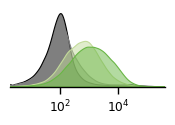

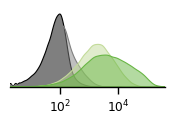

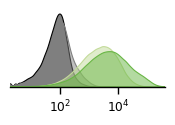

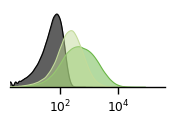

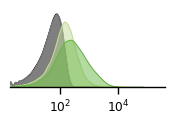

In [ ]:
reporters = ['pDA030','pDA028','pDA046','pDA047', 'lox203-3G']
plottitle = pd.array(['FigureS21C-3.svg','FigureS21C-5.svg','FigureS21C-4.svg','FigureS21C-2.svg','FigureS21C-1.svg'])

palette = {'lox203-3G-CAG.1x.+CRE': '#69B645',
'lox203-3G-CAG.1x.-CRE': '#C3DB9A',
'lox203-3G-CAG.0x.+CRE': 'gray',
'lox203-3G-CAG.0x.-CRE': 'black', 
'pDA028-CAG.1x.+CRE': '#69B645',
'pDA028-CAG.1x.-CRE': '#C3DB9A',
'pDA028-CAG.0x.+CRE': 'gray',
'pDA028-CAG.0x.-CRE': 'black', 
'pDA030-CAG.1x.+CRE': '#69B645',
'pDA030-CAG.1x.-CRE': '#C3DB9A',
'pDA030-CAG.0x.+CRE':  'gray',
'pDA030-CAG.0x.-CRE': 'black', 
'pDA046-CAG.1x.+CRE': '#69B645',
'pDA046-CAG.1x.-CRE': '#C3DB9A',
'pDA046-CAG.0x.+CRE': 'gray',
'pDA046-CAG.0x.-CRE': 'black',
'pDA047-CAG.1x.+CRE': '#69B645',
'pDA047-CAG.1x.-CRE': '#C3DB9A',
'pDA047-CAG.0x.+CRE': 'gray',
'pDA047-CAG.0x.-CRE': 'black'
                       }

xsize = 2; ysize = 1; figsize = (xsize, ysize)

for i in range(5):
    plt.figure(figsize=figsize)
    data_now = gated[(gated['reporter'] == reporters[i]) & (gated['Activator']=='CAG')]
    g = sns.kdeplot(data=data_now, x='mGL-A',y=None,hue='conds', legend=False,
                    log_scale=True,fill=True, alpha = 0.5,common_norm=False,palette=palette)
    g.spines['left'].set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.gca().set_xlabel("")
    g.set_xlim(xmin=2, xmax=400000)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    
    g = g.get_figure()
    g.savefig((output_path + plottitle[i]),bbox_inches='tight')

## Summary Statistics

In [ ]:
df = gated[(gated['reporter'] != 'Bad') & (gated['Activator'] != 'EFS')] #choose dataframe, remove conditions not used for stats

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'Activator', 'DOX','DOX#','CRE','conds', 'cond4', 'Date'] #how to filter results, columns 

x = ['mGL-A', 'iRFP670-A','TagBFP-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_well = calc_stats(df,by,x,stat) #calculate statistics 

<string>:186: FutureWarning: The provided callable <function median at 0x000001F4A7265EE0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
<string>:186: FutureWarning: The provided callable <function std at 0x000001F491022660> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
<string>:186: FutureWarning: The provided callable <function mean at 0x000001F491022520> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.


**Export summary df to excel file**

In [ ]:
s_well.to_excel('FigS21_minimal_promoters.xlsx',index=False)

**Fold Change function for minimal promoter**

In [ ]:
bioreps_plot = pd.array(['2024.11.08.x','2024.11.08.xx', '2024.11.22.x', '2024.12.16.x', '2024.12.16.xx'])

s_normalized = pd.DataFrame()
df = gated[(gated['reporter'] != 'Bad') & (gated['Activator'] != 'EFS')] # Remove conditions not used for stats

for biorep in bioreps_plot:
    df_biorep = df[df['Date'] == biorep] #choose dataframe
    by = ['reporter', 'DOX','DOX#','CRE','conds', 'cond4', 'Date']  #how to filter results, columns 
    x = ['mGL-A','TagBFP-A','mRuby2-A'] #which parameter to calculate results on
    stat = [sp.stats.gmean] #statistics to calculate
    s_biorep = calc_stats(df_biorep,by,x,stat) #calculate statistics 

    if 'lox203-3G' in s_biorep['reporter'].values:
        lox203_3G_Cre = s_biorep[(s_biorep['reporter'] == 'lox203-3G') & (s_biorep['CRE'] == '+CRE') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('lox203-3G-CRE value is ' +str(lox203_3G_Cre)+ '')

        lox203_3G_noCre = s_biorep[(s_biorep['reporter'] == 'lox203-3G') & (s_biorep['CRE'] == '-CRE') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('lox203-3G-noCRE value is ' +str(lox203_3G_noCre)+ '')

    if 'pDA028' in s_biorep['reporter'].values:
        pDA028_Cre = s_biorep[(s_biorep['reporter'] == 'pDA028') & (s_biorep['CRE'] == '+CRE') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('pDA028-CRE value is ' +str(pDA028_Cre)+ '')

        pDA028_noCre = s_biorep[(s_biorep['reporter'] == 'pDA028') & (s_biorep['CRE'] == '-CRE') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('pDA028-noCRE value is ' +str(pDA028_noCre)+ '')

    if 'pDA030' in s_biorep['reporter'].values:
        pDA030_Cre = s_biorep[(s_biorep['reporter'] == 'pDA030') & (s_biorep['CRE'] == '+CRE') &  (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('pDA030-CRE value is ' +str(pDA030_Cre)+ '')

        pDA030_noCre = s_biorep[(s_biorep['reporter'] == 'pDA030') & (s_biorep['CRE'] == '-CRE') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('pDA030-noCRE value is ' +str(pDA030_noCre)+ '')

    if 'pDA046' in s_biorep['reporter'].values:
        pDA046_Cre = s_biorep[(s_biorep['reporter'] == 'pDA046') & (s_biorep['CRE'] == '+CRE') &  (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('pDA046-CRE value is ' +str(pDA046_Cre)+ '')

        pDA046_noCre = s_biorep[(s_biorep['reporter'] == 'pDA046') & (s_biorep['CRE'] == '-CRE') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('pDA046-noCRE value is ' +str(pDA046_noCre)+ '')

    if 'pDA047' in s_biorep['reporter'].values:
        pDA047_Cre = s_biorep[(s_biorep['reporter'] == 'pDA047') & (s_biorep['CRE'] == '+CRE') &  (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('pDA047-CRE value is ' +str(pDA047_Cre)+ '')

        pDA047_noCre = s_biorep[(s_biorep['reporter'] == 'pDA047') & (s_biorep['CRE'] == '-CRE') & (s_biorep['DOX'] == '1x')]['mGL-A_gmean'].iloc[0]
        print('pDA047-noCRE value is ' +str(pDA047_noCre)+ '')


    def normalize_mGL_gmean(data):
        if data['reporter'] == 'lox203-3G':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / lox203_3G_noCre
            else:
                return data['mGL-A_gmean'] / lox203_3G_noCre
        elif data['reporter'] == 'pDA046':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / pDA046_noCre
            else:
                return data['mGL-A_gmean'] / pDA046_noCre
        elif data['reporter'] == 'pDA028':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / pDA028_noCre
            else:
                return data['mGL-A_gmean'] / pDA028_noCre
        elif data['reporter'] == 'pDA030':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / pDA030_noCre
            else:
                return data['mGL-A_gmean'] / pDA030_noCre
        elif data['reporter'] == 'pDA047':
            if data['CRE'] == '-CRE':
                return data['mGL-A_gmean'] / pDA047_noCre
            else:
                return data['mGL-A_gmean'] / pDA047_noCre
            
    s_biorep['Normalized_mGL-A_gmean'] = s_biorep.apply(normalize_mGL_gmean, axis=1)

    s_normalized = pd.concat([s_normalized, s_biorep], ignore_index=True)

# Only take those at 1x DOX concentration
s_normalized = s_normalized[s_normalized['DOX'] == '1x']
s_normalized = s_normalized.dropna()

lox203-3G-CRE value is 155.59443787723848
lox203-3G-noCRE value is 81.71999376847025
pDA028-CRE value is 10036.464416769246
pDA028-noCRE value is 3711.3880521014603
pDA030-CRE value is 1344.031899365776
pDA030-noCRE value is 520.9720940804041
pDA046-CRE value is 4410.7002346771205
pDA046-noCRE value is 1954.5732182605664
lox203-3G-CRE value is 145.7528347688557
lox203-3G-noCRE value is 84.89469889704249
pDA028-CRE value is 9297.55181852181
pDA028-noCRE value is 3590.0709618224805
pDA030-CRE value is 1293.4303814576901
pDA030-noCRE value is 567.1987019920849
pDA046-CRE value is 5257.208262908405
pDA046-noCRE value is 2128.336521570492
lox203-3G-CRE value is 432.8860681366076
lox203-3G-noCRE value is 162.1017668647627
pDA028-CRE value is 4157.5563310052285
pDA028-noCRE value is 1324.6369558587128
pDA030-CRE value is 1373.5286343571406
pDA030-noCRE value is 682.6474087365486
pDA046-CRE value is 5211.002768576819
pDA046-noCRE value is 2105.5094179277344
pDA047-CRE value is 557.811289377460

**Figure S21A: Minimal promoter fold change**

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


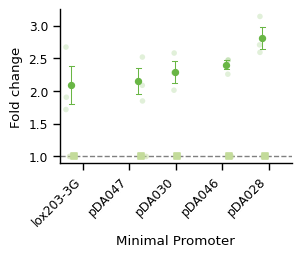

<Figure size 640x480 with 0 Axes>

In [ ]:
xsize = 3; ysize=2
g = plt.figure(figsize=(xsize,ysize))
yscale = 'linear'
order_repts = pd.array( ['loxCN-3G','Vlox90-3G', 'lox203-3G', 'lox380-3G', 'lox610-3G'])

hue_order2 = pd.array([ 
 'lox203-3G-CAG.1x.+CRE', 'lox203-3G-CAG.1x.-CRE',
 'pDA028-CAG.1x.+CRE', 'pDA028-CAG.1x.-CRE',
 'pDA030-CAG.1x.+CRE', 'pDA030-CAG.1x.-CRE',
 'pDA046-CAG.1x.+CRE', 'pDA046-CAG.1x.-CRE',
  'pDA047-CAG.1x.+CRE', 'pDA047-CAG.1x.-CRE'])

order = np.array(['lox203-3G','pDA047', 'pDA030', 'pDA046', 'pDA028'])

palette = {'lox203-3G-CAG.1x.+CRE': '#69B645',
'lox203-3G-CAG.1x.-CRE': '#C3DB9A',
'pDA028-CAG.1x.+CRE': '#69B645',
'pDA028-CAG.1x.-CRE': '#C3DB9A',
'pDA030-CAG.1x.+CRE': '#69B645',
'pDA030-CAG.1x.-CRE': '#C3DB9A',
'pDA046-CAG.1x.+CRE': '#69B645',
'pDA046-CAG.1x.-CRE': '#C3DB9A',
'pDA047-CAG.1x.+CRE': '#69B645',
'pDA047-CAG.1x.-CRE': '#C3DB9A'
                        }
data_now = s_normalized[s_normalized['conds'].isin(hue_order2)]
plt.yticks(range(0,7))
plt.axhline(y=1, ls='--',lw=1, color='gray')
markers = pd.array(['o', 's','o', 's','o', 's','o', 's','o','s','o','s'])

plottitle = 'FigureS21A.svg'
g = summary_plot( x='reporter', y='Normalized_mGL-A_gmean', hue='conds', data=data_now, yscale=yscale, legend=False,
                     #ylim=ylim,
                    x_rot=45, palette = palette,hue_order=hue_order2, order=order,xlabel='Minimal Promoter',ylabel='Fold change',
                    type='pointplot', markers=markers)

g = g.get_figure()
g.savefig((output_path + plottitle),bbox_inches='tight')


**Figure S21B: Minimal promoter mGL gmean**

c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\chemegrad202\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

lox203-3G_lox203-3G-CAG.1x.+CRE v.s. lox203-3G_lox203-3G-CAG.1x.-CRE: t-test independent samples, P_val=2.388e-01 stat=1.383e+00
pDA047_pDA047-CAG.1x.+CRE v.s. pDA047_pDA047-CAG.1x.-CRE: t-test independent samples, P_val=2.220e-02 stat=3.628e+00
pDA046_pDA046-CAG.1x.+CRE v.s. pDA046_pDA046-CAG.1x.-CRE: t-test independent samples, P_val=4.936e-04 stat=1.034e+01
pDA030_pDA030-CAG.1x.+CRE v.s. pDA030_pDA030-CAG.1x.-CRE: t-test independent samples, P_val=1.524e-04 stat=1.397e+01
pDA028_pDA028-CAG.1x.+CRE v.s. pDA028_pDA028-CAG.1x.-CRE: t-test independent samples, P_val=6.886e-02 stat=2.471e+00


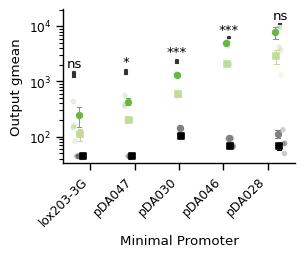

<Figure size 640x480 with 0 Axes>

In [ ]:
xsize = 3; ysize=2
g = plt.figure(figsize=(xsize,ysize))
yscale = 'log'
hue_order2 = np.array([ 
 'lox203-3G-CAG.1x.+CRE', 'lox203-3G-CAG.1x.-CRE', 'lox203-3G-CAG.0x.+CRE', 'lox203-3G-CAG.0x.-CRE',
  'pDA047-CAG.1x.+CRE', 'pDA047-CAG.1x.-CRE','pDA047-CAG.0x.+CRE', 'pDA047-CAG.0x.-CRE',
   'pDA030-CAG.1x.+CRE', 'pDA030-CAG.1x.-CRE', 'pDA030-CAG.0x.+CRE', 'pDA030-CAG.0x.-CRE',
    'pDA046-CAG.1x.+CRE', 'pDA046-CAG.1x.-CRE', 'pDA046-CAG.0x.+CRE', 'pDA046-CAG.0x.-CRE',
 'pDA028-CAG.1x.+CRE', 'pDA028-CAG.1x.-CRE', 'pDA028-CAG.0x.+CRE', 'pDA028-CAG.0x.-CRE'])

order = np.array(['lox203-3G','pDA047', 'pDA030', 'pDA046', 'pDA028'])

palette = {'lox203-3G-CAG.1x.+CRE': '#69B645',
'lox203-3G-CAG.1x.-CRE': '#C3DB9A',
'lox203-3G-CAG.0x.+CRE': 'gray',
'lox203-3G-CAG.0x.-CRE': 'black', 
'pDA028-CAG.1x.+CRE': '#69B645',
'pDA028-CAG.1x.-CRE': '#C3DB9A',
'pDA028-CAG.0x.+CRE': 'gray',
'pDA028-CAG.0x.-CRE': 'black', 
'pDA030-CAG.1x.+CRE': '#69B645',
'pDA030-CAG.1x.-CRE': '#C3DB9A',
'pDA030-CAG.0x.+CRE':  'gray',
'pDA030-CAG.0x.-CRE': 'black', 
'pDA046-CAG.1x.+CRE': '#69B645',
'pDA046-CAG.1x.-CRE': '#C3DB9A',
'pDA046-CAG.0x.+CRE': 'gray',
'pDA046-CAG.0x.-CRE': 'black',
'pDA047-CAG.1x.+CRE': '#69B645',
'pDA047-CAG.1x.-CRE': '#C3DB9A',
'pDA047-CAG.0x.+CRE': 'gray',
'pDA047-CAG.0x.-CRE': 'black'
                        }
data_now = s_well[s_well['conds'].isin(hue_order2) & (s_well['Date'] != '2024.11.18.x')]
plt.yticks(range(0,7))
markers = pd.array(['o', 's','o', 's','o', 's','o', 's','o','s','o', 's','o', 's','o', 's','o', 's','o', 's'])
pairs = [
    [('pDA047', 'pDA047-CAG.1x.+CRE'), ('pDA047','pDA047-CAG.1x.-CRE')],
    [('pDA046', 'pDA046-CAG.1x.+CRE'), ('pDA046','pDA046-CAG.1x.-CRE')],
    [('pDA030', 'pDA030-CAG.1x.+CRE'), ('pDA030','pDA030-CAG.1x.-CRE')],
    [('pDA028', 'pDA028-CAG.1x.+CRE'), ('pDA028','pDA028-CAG.1x.-CRE')],
    [('lox203-3G', 'lox203-3G-CAG.1x.+CRE'), ('lox203-3G','lox203-3G-CAG.1x.-CRE')]
]
plottitle = 'FigureS21B.svg'
g = summary_plot( x='reporter', y='mGL-A_gmean', hue='conds', data=data_now, yscale=yscale, legend=False,
                     #ylim=ylim,
                    x_rot=45, palette = palette,hue_order=hue_order2,xlabel='Minimal Promoter',ylabel='Output gmean',
                    type='pointplot',order=order, markers=markers, pairs = pairs)

g = g.get_figure()
g.savefig((output_path + plottitle),bbox_inches='tight')
